<a href="https://colab.research.google.com/github/notShyam7/comment_toxicity/blob/main/CommentToxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
# colab mount
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Comment Toxicity/test.csv')
df_test_labels = pd.read_csv('/content/gdrive/MyDrive/Comment Toxicity/test_labels.csv')
df_train = pd.read_csv('/content/gdrive/MyDrive/Comment Toxicity/train.csv')

In [6]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [9]:
df_train.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df_train[df_train.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
#training data
X_train = df_train['comment_text']
y_train = df_train[df_train.columns[2:]].values

In [13]:
#testing data
X_test = df_test['comment_text']
y_test = df_test_labels[df_test_labels.columns[1:]].values

In [14]:
X_train

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [15]:
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
X_test

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

In [17]:
y_test

array([[-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1]])

In [18]:
MAX_WORDS = 300000 #size of the vocabulary

In [19]:
vectorizer = TextVectorization(max_tokens= MAX_WORDS,
                                            output_sequence_length= 2000,
                                            output_mode= 'int')

In [20]:
vectorizer.adapt(X_train.values)

In [21]:
vectorizer.adapt(X_test.values)

In [22]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'a',
 'of',
 'and',
 'you',
 'is',
 'i',
 'that',
 'in',
 'it',
 'this',
 'for',
 'not',
 'on',
 'be',
 'as',
 'are',
 'have',
 'with',
 'your',
 'if',
 'article',
 'was',
 'but',
 'or',
 'an',
 'at',
 'from',
 'my',
 'by',
 'page',
 'about',
 'so',
 'do',
 'what',
 'can',
 'all',
 'there',
 'its',
 'wikipedia',
 'me',
 'fuck',
 'would',
 'like',
 'has',
 'just',
 'they',
 'one',
 'no',
 'will',
 'we',
 'dont',
 'he',
 'please',
 'should',
 'which',
 'more',
 'any',
 'some',
 'been',
 'think',
 'im',
 'see',
 'other',
 'who',
 'here',
 'also',
 'his',
 'up',
 'people',
 'know',
 'because',
 'how',
 'out',
 'only',
 'when',
 'were',
 'why',
 'articles',
 'use',
 'then',
 'edit',
 'them',
 'talk',
 'may',
 'time',
 'now',
 'am',
 'than',
 'their',
 'did',
 'being',
 'get',
 'even',
 'make',
 'thanks',
 'does',
 'good',
 'had',
 'could',
 'very',
 'well',
 'sources',
 'these',
 'name',
 'way',
 'say',
 'section',
 'want',
 'such',
 'information',
 'go',
 'fi

In [23]:
vectorizer('hello, how are you?')[:4]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([326,  75,  19,   7])>

In [24]:
vectorized_training_text = vectorizer(X_train.values)

In [25]:
vectorized_testing_text = vectorizer(X_test.values)

In [26]:
vectorized_training_text

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  738,    80,     2, ...,     0,     0,     0],
       [    1,    55,  3267, ...,     0,     0,     0],
       [  480,   352,    64, ...,     0,     0,     0],
       ...,
       [27758,  6733,   335, ...,     0,     0,     0],
       [    6,    12,   465, ...,     0,     0,     0],
       [    6,     9,   120, ...,     0,     0,     0]])>

In [27]:
training_dataset = tf.data.Dataset.from_tensor_slices((vectorized_training_text, y_train))
training_dataset = training_dataset.cache()
training_dataset = training_dataset.shuffle(160000)
training_dataset = training_dataset.batch(16)
training_dataset = training_dataset.prefetch(8)

In [28]:
testing_dataset = tf.data.Dataset.from_tensor_slices((vectorized_testing_text, y_test))
testing_dataset = testing_dataset.cache()
testing_dataset = testing_dataset.shuffle(160000)
testing_dataset = testing_dataset.batch(16)
testing_dataset = testing_dataset.prefetch(8)

In [29]:
training_dataset.as_numpy_iterator().next()

(array([[   290,    124,    393, ...,      0,      0,      0],
        [   150,      4,    274, ...,      0,      0,      0],
        [     7,    102,    156, ...,      0,      0,      0],
        ...,
        [   141,      7,  13044, ...,      0,      0,      0],
        [    22,    526,   2384, ...,      0,      0,      0],
        [201211,      1,      1, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [30]:
batch_X_train, batch_y_train = training_dataset.as_numpy_iterator().next()

In [31]:
batch_X_test, batch_y_test = testing_dataset.as_numpy_iterator().next()

In [32]:
batch_X_train.shape

(16, 2000)

In [33]:
batch_y_train.shape

(16, 6)

In [34]:
train = training_dataset.take(int(len(training_dataset)*.7))
val = training_dataset.skip(int(len(training_dataset)*.7)).take(int(len(training_dataset)*.3))
test = testing_dataset.take(int(len(testing_dataset)))

In [35]:
len(train)

6981

In [36]:
train_generator = train.as_numpy_iterator()

In [37]:
train_generator.next()

(array([[   436,     98,    131, ...,      0,      0,      0],
        [  9033,      2,   9033, ...,      0,      0,      0],
        [   446,  19109,     28, ...,      0,      0,      0],
        ...,
        [    40,      8,    116, ...,      0,      0,      0],
        [243702,    690,     14, ...,      0,      0,      0],
        [   436,     98,  17525, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

###Deep Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [39]:
from keras.api._v2.keras import activations
model = Sequential()
#creating embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
#creating lstm layer
model.add(Bidirectional(LSTM(32, activation= 'tanh')))
#feature extractor dense layers
model.add(Dense(128, activation= 'relu'))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
#final layer
model.add(Dense(6, activation= 'sigmoid')) #no. of layers

In [40]:
model.compile(loss= 'BinaryCrossentropy', optimizer= 'Adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          9600032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [42]:
history = model.fit(train, epochs= 1, validation_data= val)

6981/6981 [==============================] - 910s 129ms/step - loss: 0.0612 - val_loss: 0.0467


In [43]:
history.history

{'loss': [0.061173729598522186], 'val_loss': [0.04665035009384155]}

In [44]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

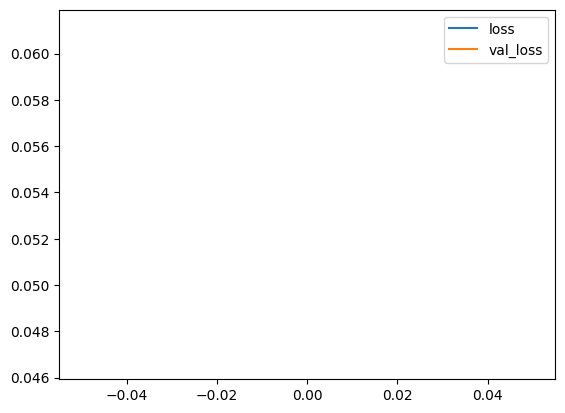

In [45]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [46]:
input_text = vectorizer('im coming for you')

In [47]:
input_text

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([ 64, 909,  14, ...,   0,   0,   0])>

In [48]:
batch = test.as_numpy_iterator().next()

In [49]:
batch_X_test, batch_y_test = test.as_numpy_iterator().next()

In [50]:
(model.predict(batch_X_test) > 0.5).astype(int)

1/1 [==============================] - 1s 813ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [51]:
batch_y_test

array([[-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [ 1,  0,  1,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1]])

In [52]:
res = model.predict(batch_X_test)

1/1 [==============================] - 0s 67ms/step


In [53]:
res.flatten()

array([4.28400526e-04, 2.58132360e-07, 3.43000393e-05, 4.46826789e-06,
       1.04656510e-05, 4.24708605e-06, 4.25373495e-01, 5.56570385e-03,
       1.00995824e-01, 1.40922191e-02, 1.41898766e-01, 2.55512260e-02,
       6.04278030e-05, 1.04288596e-08, 3.52661300e-06, 3.03405358e-07,
       6.68690916e-07, 3.20188292e-07, 9.71134543e-01, 1.02541760e-01,
       8.29993427e-01, 5.37935868e-02, 7.37962484e-01, 1.25793338e-01,
       7.86077944e-05, 1.46339350e-08, 4.48495621e-06, 4.22691699e-07,
       9.48780098e-07, 4.15735855e-07, 9.88926768e-01, 1.74362034e-01,
       9.20687258e-01, 6.33074567e-02, 8.22277844e-01, 1.56172320e-01,
       8.28871543e-06, 3.69268283e-10, 3.32967915e-07, 1.86111091e-08,
       4.08910772e-08, 2.14334754e-08, 7.24289715e-02, 3.88141227e-04,
       9.49969701e-03, 1.80055655e-03, 1.02222655e-02, 2.01204466e-03,
       1.91133659e-04, 7.13431305e-08, 1.38779833e-05, 1.52002838e-06,
       3.34794822e-06, 1.53349083e-06, 1.99279543e-02, 2.07611793e-05,
      

In [54]:
from tensorflow.keras.metrics import  Precision, Recall, CategoricalAccuracy

In [55]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [56]:
test.as_numpy_iterator().next()

(array([[   23,     7,   156, ...,     0,     0,     0],
        [ 5921, 54679,    23, ...,     0,     0,     0],
        [12373,    70,   386, ...,     0,     0,     0],
        ...,
        [   64,   820,    26, ...,     0,     0,     0],
        [  106,  9602,  1048, ...,     0,     0,     0],
        [10751,    56,   277, ...,     0,     0,     0]]),
 array([[ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0],
        [ 1,  0,  1,  1,  1,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0]]))

In [57]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 69ms/step


In [59]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8771995306015015, Recall:0.12426357716321945, Accuracy:0.14624464511871338


In [60]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 11.5 MB/s eta 0:

In [61]:
import tensorflow as tf
import gradio as gr

In [64]:
model.save('/content/gdrive/MyDrive/Comment Toxicity/toxicity.h5')

In [66]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Comment Toxicity/toxicity.h5')